<a href="https://colab.research.google.com/github/AndriiVasylenkoML/image-preprocessing/blob/main/numpy_for_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Crop Image

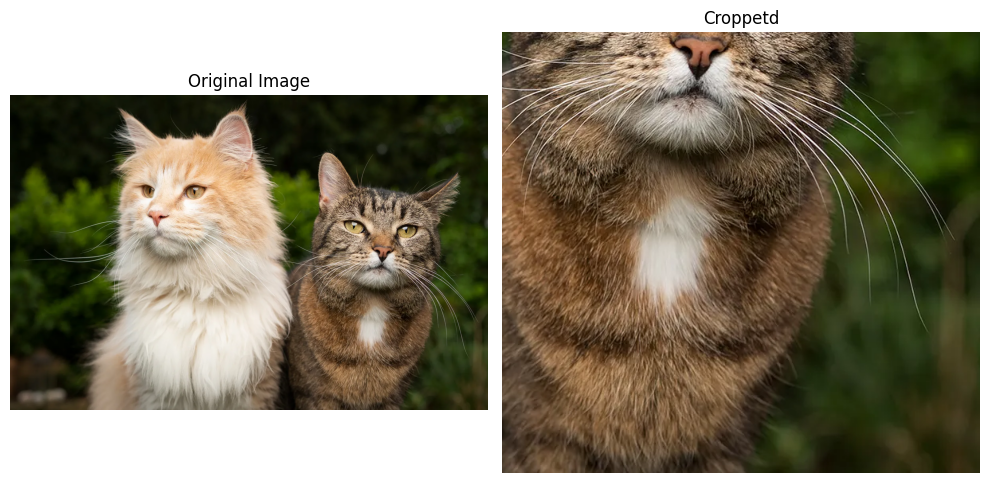

In [ ]:
# Load the image using PIL (Python Imaging Library)
img = Image.open("cat.jpg")

# Convert the image to a NumPy array
img_array = np.array(img)

# Define the cropping coordinaes
y1, x1 = 500, 1000  # Top-left corner of ROI
y2, x2 = 1500, 2000  # Botton-right corner of ROI
cropped_img = img_array[y1:y2, x1:x2]

def display(new_img_array, description):
  plt.figure(figsize=(10, 5))

  # Display the original image
  plt.subplot(1, 2, 1)
  plt.imshow(img_array)
  plt.title("Original Image")
  plt.axis("off")

  # Display the new image
  plt.subplot(1, 2, 2)
  plt.imshow(new_img_array)
  plt.title(f"{description}")
  plt.axis("off")

  plt.tight_layout()
  plt.show()

# Display the original image and the cropped image
display(cropped_img, "Croppetd")

[![image.png](https://i.postimg.cc/h47pYXC1/image.png)](https://postimg.cc/K4xPk8h1)

[![image.png](https://i.postimg.cc/QxQSXRZB/image.png)](https://postimg.cc/sv25mHXy)

## Rotated image

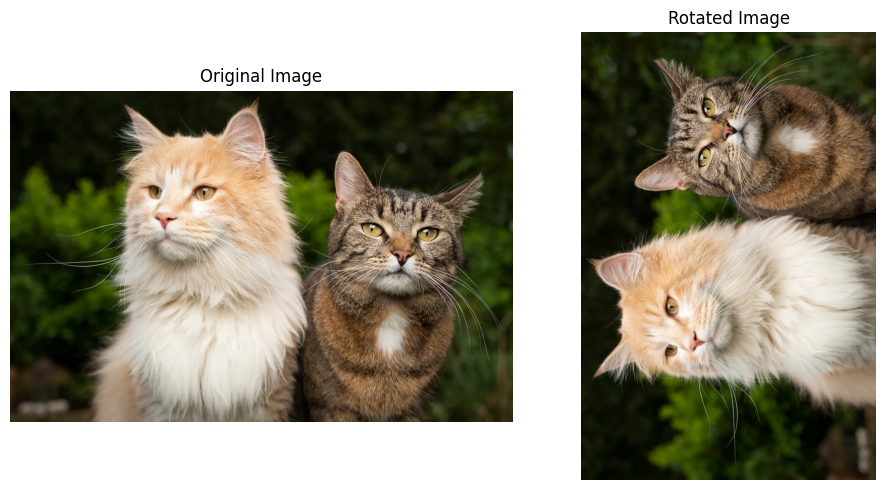

In [ ]:
# Rotate the image to a NumPy array
rotated_img = np.rot90(img_array)

# Display the original image and the rotated image
display(rotated_img, "Rotated Image")

## Flipped image

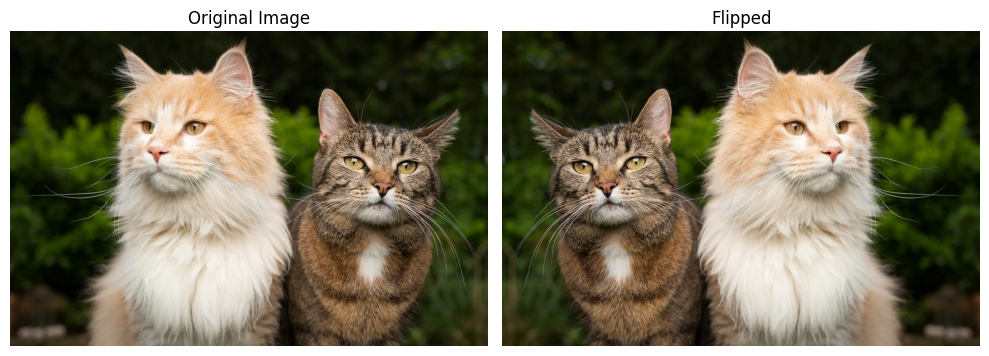

In [ ]:
# Flip hte image to a NumPy array
flipped_img = np.fliplr(img_array)

# Display the original image and the flipped image
display(flipped_img, "Flipped")

## Negative of an Image

The negative of an image is made by reversing its pixel values. In grayscale images, each pixel's value is subtracted from the maximum (255 for 8-bit images). In color images, this is done separately for each color channel.

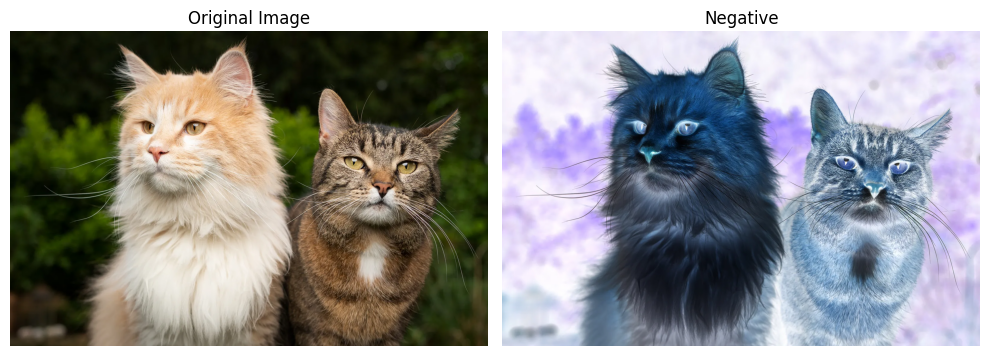

In [ ]:
# Check if create negative of an image:
is_grayscale = len(img_array.shape) < 3

# Function to create negative of an image
def create_negative(image):
  if is_grayscale:
    # For grayscale images
    negative_image = 255 - image
  else:
    # For color images (RGB)
    negative_image = 255 - image
  return negative_image

# Create negative of the image
negative_img = create_negative(img_array)

# Display negative of the image
display(negative_img, "Negative")

## Binarize Image


Binarizing an image converts it to black and white. Each pixel is marked black or white based on a threshold value. Pixels that are less than the threshold become 0 (black) and above those above it become 255 (white).

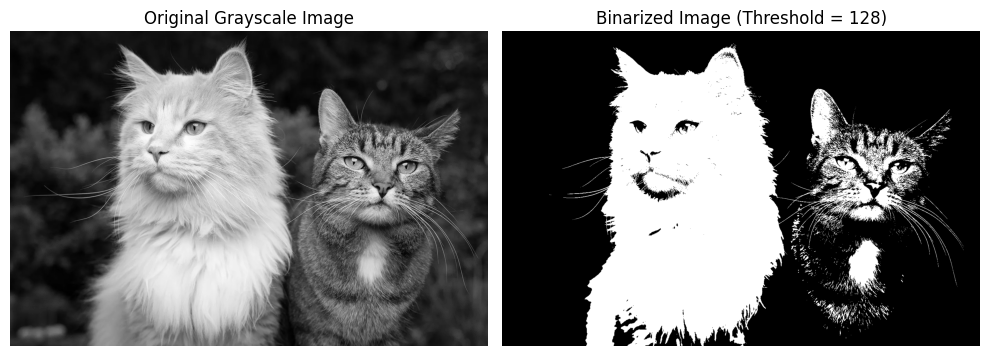

In [ ]:
# Convert the image to graysclae
img_gray = img.convert("L")

# Convert the grayscale image to a NumPy array
img_array = np.array(img_gray)

# Binarize the image using a threshold
threshold = 128
binary_img = np.where(img_array < threshold, 0, 255).astype(np.uint8)

# Display the original and binrized images
plt.figure(figsize= (10, 5))

# Display the original and binarized images
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_img, cmap="gray")
plt.title("Binarized Image (Threshold = 128)")
plt.axis("off")

plt.tight_layout()
plt.show()

## Color Space Conversion


Color space conversion changes an image from one color model to another. This is done by changing the array of pixel values. We use a weighted sum of the RGB channels to convert a color image to a grayscale.

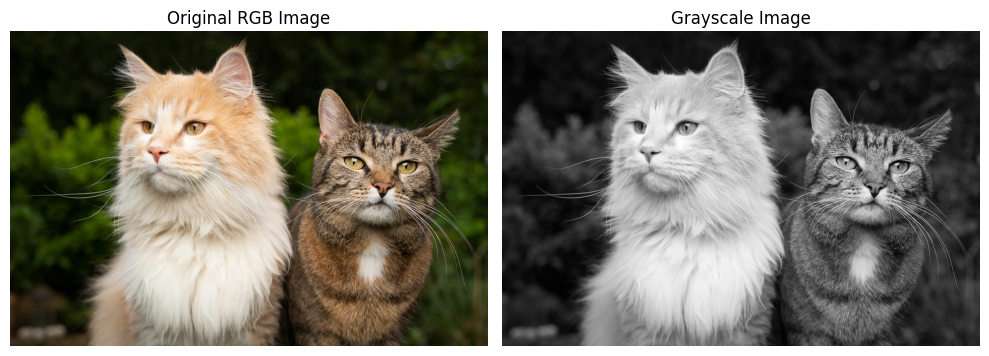

In [ ]:
img = Image.open("cat.jpg")
img_array = np.array(img)

# Grayscale conversion formula: Y = 0.299*R + 0.587*G + 0.114*B
gray_img = np.dot (img_array[..., :3], [0.299, 0.587, 0.114])

# Display the orginal RGB image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original RGB Image")
plt.axis("off")

# Display the converted graysclae image
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.tight_layout()
plt.show()

## Pixel Intensity Histogram


The histogram shows the distribution of pixel values in an image. The image is flattened into a one-dimensional array to compute the histogram.

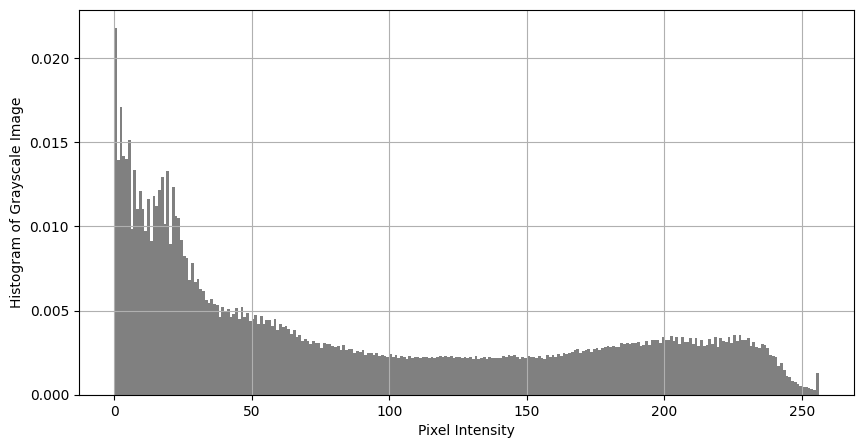

In [ ]:
# Compute the histogram of the image
hist, bins = np.histogram(img_array.flatten(), bins=256, range= (0, 256))

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(img_array.flatten(), bins=256, range= (0, 256), density=True, color='gray')
plt.xlabel("Pixel Intensity")
plt.ylabel("Histogram of Grayscale Image")
plt.grid(True)
plt.show()

## Masking Image


Masking an image means showing or hiding parts based on rules. Pixels marked as 1 are kept while pixels marked as 0 are hidden.



In [ ]:
# Slicing Notation [:, :, 0]
# (height, width, channels)
# This numpy method returns an array of given shape and type as given array, with zeros
print(np. zeros_like(img_array[:, :, 0], dtype=np.uint8))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


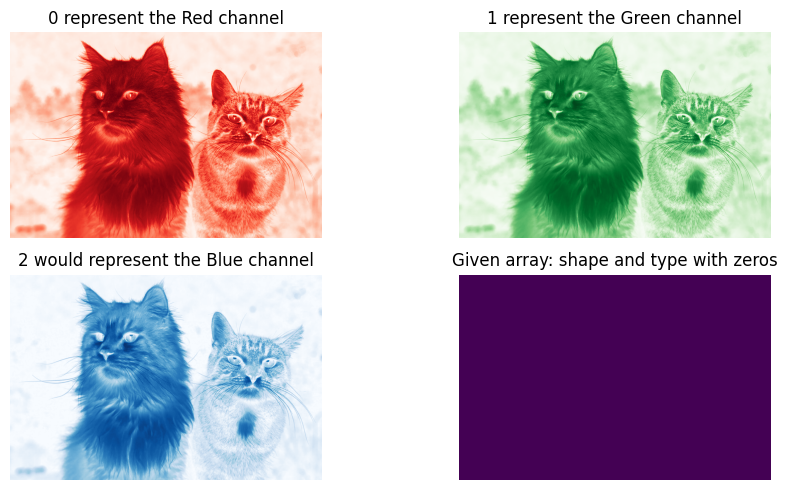

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(img_array[:, :, 0], cmap="Reds")
plt.title("0 represent the Red channel")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_array[:, :, 1], cmap="Greens")
plt.title("1 represent the Green channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img_array[:, :, 2], cmap="Blues")
plt.title("2 would represent the Blue channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(np.zeros_like(img_array[:, :, 0], dtype=np.uint8))
plt.title("Given array: shape and type with zeros")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
print(f"height / 2: {img_array.shape[0] // 2} px\nwhight / 2: {img_array.shape[1] // 2} px\n{min(img_array.shape[0], img_array.shape[1]) // 2}")

height / 2: 527 px
whight / 2: 800 px
527


In [ ]:
mask = np. zeros_like(img_array[:, :, 0], dtype=np.uint8)
center = (img_array.shape[0] // 2, img_array.shape[1] // 2)

radius = min(img_array.shape[0], img_array.shape[1]) // 2  # Increase radius for a bigger circle
rr, cc = np.meshgrid(np.arange(img_array.shape[0]), np.arange(img_array.shape[1]), indexing="ij")

In [ ]:
print(f"({rr} - {center[0]}) ** 2 + ({cc} - {center[1]}) ** 2 < {radius} ** 2")

([[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1051 1051 1051 ... 1051 1051 1051]
 [1052 1052 1052 ... 1052 1052 1052]
 [1053 1053 1053 ... 1053 1053 1053]] - 527) ** 2 + ([[   0    1    2 ... 1597 1598 1599]
 [   0    1    2 ... 1597 1598 1599]
 [   0    1    2 ... 1597 1598 1599]
 ...
 [   0    1    2 ... 1597 1598 1599]
 [   0    1    2 ... 1597 1598 1599]
 [   0    1    2 ... 1597 1598 1599]] - 800) ** 2 < 527 ** 2


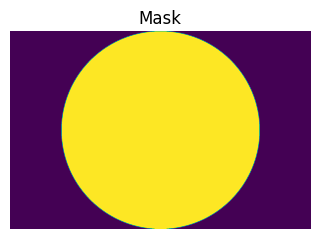

In [ ]:
circle_mask = (rr - center[0]) ** 2 + (cc - center[1]) ** 2 < radius ** 2
mask[circle_mask] = 1

plt.figure(figsize=(5, 2.5))
plt.subplot(1, 1, 1)
plt.imshow(mask)
plt.title(f"Mask")
plt.axis("off")

plt.tight_layout()
plt.show()

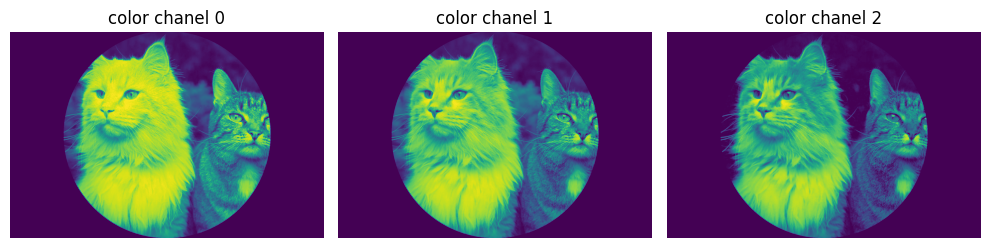

In [ ]:
# Apply the mask to the image
masked_img = img_array.copy()

plt.figure(figsize=(10, 5))


for i in range(img_array.shape[2]): # Apply to each color channel
  masked_img[:,:,i] = img_array[:,:,i] * mask

  plt.subplot(1, 3, i+1)
  plt.imshow(img_array[:,:,i] * mask)
  plt.title(f"color chanel {i}")
  plt.axis("off")

plt.tight_layout()
plt.show()

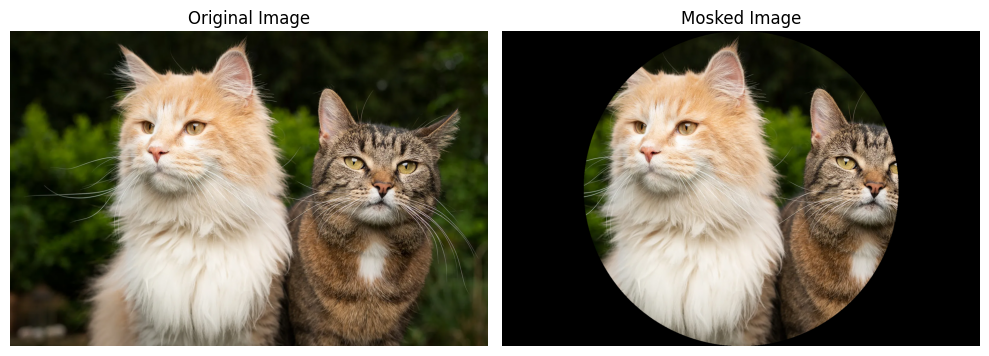

In [ ]:
# Displaying the original image and the masked image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masked_img)
plt.title("Mosked Image")
plt.axis("off")

plt.tight_layout()
plt.show()